# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
do_random = True # draw new coeff at random
do_random = False # draw new coeff with bootstrap resampling?

do_double_shuffle = True # shuffle accross dictionary elements
do_double_shuffle = False # only shuffles 

l0_sparseness_noise = 200 #shl.n_dictionary #

In [4]:
tag = 'coding'
homeo_methods = ['None', 'HAP', 'HEH']


record_num_batches = 2**12

seed = 42
np.random.seed(seed)

from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag)
indx = np.random.permutation(data.shape[0])[:record_num_batches]

list_figures = []

dico = {}
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)


🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [5]:
from shl_scripts.shl_encode import sparse_encode
stick = np.arange(shl.n_dictionary)*shl.nb_quant
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))

for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method)

    for P_cum_rec, gain_rec in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None]):
        sparse_code = sparse_encode(data[indx, :], dico[homeo_method].dictionary, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

        # from shl_scripts.shl_tools import print_stats
        # SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)

## Generating new coefficients by shuffling and decoding

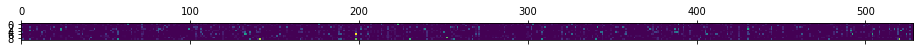

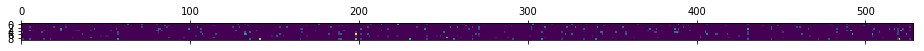

average non-zeros [2395  492  350  772  211 1632  170  723  203 1402  308  306  958  559
 1344  178  288 2156  202 2052 1148  438  168  459  202  203 2120  191
  240  252  174  762 1824 1938 2346  245 1612 1669  176  934 1670 1526
 1189  541  611  790  215  190  332  298 2152  409  159  276 2244 1625
 1610 2717  112  343  742  292  249  374  165 2263  266  984 1401 1085
  652 3055 1262 1277  762  280  828  360 2404  237 3146 1514 2010 1625
 1507  246 1347 1734  253  137 1006  159  156  821 1645  555  290  137
  229  310  244  157  280 2912 2042  261 3102  196  292  281  223  311
 2231 1278  962  597  953 2035  412 2239]
average non-zeros [ 562  189  131  116   60  358   41  147   57  257  118   72  188  143
  297   63  104  557   54  558  166  144   64  176   76   59  413   45
   73   59   61  198  362  392  478   53  348  366   55  205  286  358
  224  219  143  240   58   43   91   76  355  162   42   80  555  273
  336 1001   42   84  153  100  104   94   32  697   88  123  257  133

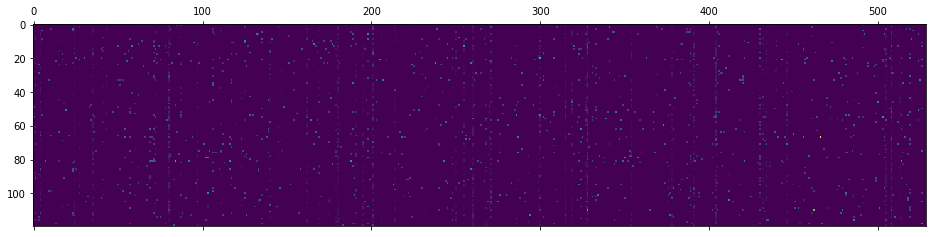

<Figure size 1080x216 with 0 Axes>

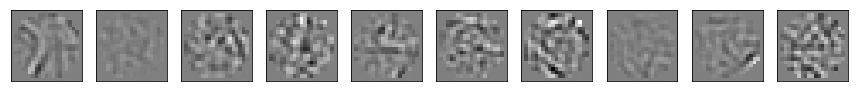

<Figure size 1080x216 with 0 Axes>

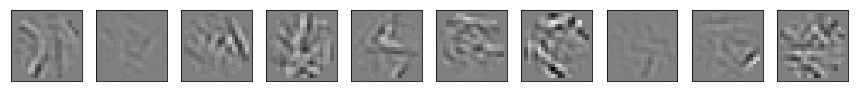

<Figure size 1080x216 with 0 Axes>

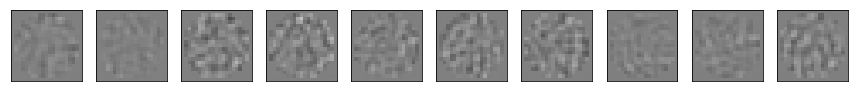

mean deviation of coefficients =  0.061450811047845146 0.036608172004365405 0.02610470157013466
total deviation of coefficients =  0.029631101157490798
mean deviation of quantiles =  0.006764061188333595
mean deviation of quantiles =  0.005853253537709414
total deviation of quantiles =  0.0079466738670177
ratio deviation of quantiles =  1.1748376671582794
proba incorrect coefficients =  0.20397695386342152
proba incorrect coefficients (strong) =  0.06402530201441403


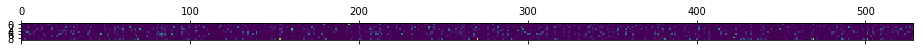

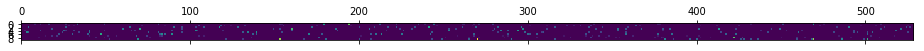

average non-zeros [1801  265 1362  795  648  312  345 1707  800 1017 1467 1438 2187 1095
  417  423  384  358 2352  363  755 1324  710  623 1645  978 1821  692
  458 1743  882 2532 1700 1268 1995  474  391  604 1417 1565 1606 1966
  413  544  616 1451 2064  341  296 2155 2326  955 1991  483  546 2591
  324 1781 1196  735 1980  468  436 1220  357 2399  314 1857  638 1830
  692  706  565  349 1039  365  436 1040 1318  456 2266 1384 1007 2048
  609 2732 1847 1269 1014 1919  340  427  635  299  478 1655 2019  985
 1451 1905  770  402  969 1550 1401  418 1164 1087  458  385  814  660
  354 1023  375  439  404  902  781  698]
average non-zeros [302 105 261 165 131 105 136 300 170 223 294 280 361 220 133 122 125 126
 611 121 170 264 185 148 263 187 387 175 127 322 182 506 261 206 347 109
 134 157 272 276 272 351 132 143 140 239 402 105  91 404 562 174 315 144
 119 665 101 324 256 172 380 134 120 169  99 478  84 358 173 298 151 159
 153 132 202 117 145 154 248 145 540 284 200 415 126 646 355 1

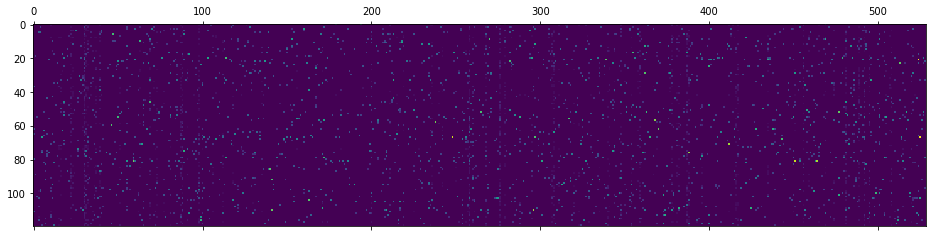

<Figure size 1080x216 with 0 Axes>

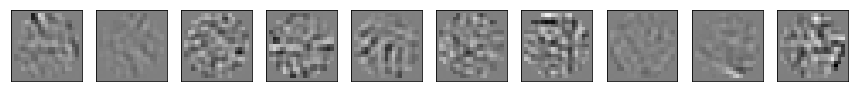

<Figure size 1080x216 with 0 Axes>

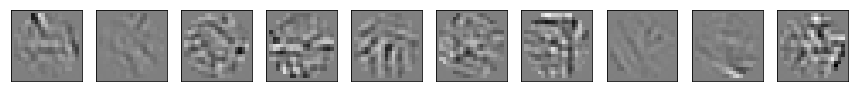

<Figure size 1080x216 with 0 Axes>

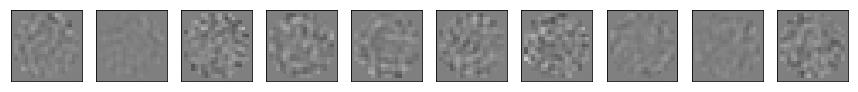

mean deviation of coefficients =  0.06448389122900652 0.03497647783420204 0.0298701816562885
total deviation of coefficients =  0.025249707054476694
mean deviation of quantiles =  0.006759404810647823
mean deviation of quantiles =  0.006453355068721168
total deviation of quantiles =  0.006608110899995304
ratio deviation of quantiles =  0.9776172732820807
proba incorrect coefficients =  0.2332092169777883
proba incorrect coefficients (strong) =  0.05346125871337426


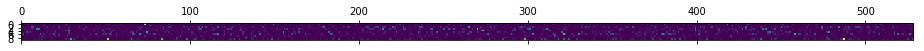

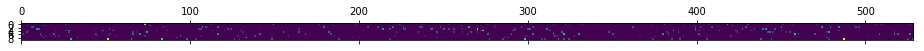

average non-zeros [ 997  835 1061 1405 1275 1379 1569 1032 1591  889 1037 1118  887 1060
  801  925 1079 1541 1499 1341 1389 1619 1554 1484 1384  865 1683 1112
 1398 1276 1160  802 1588 1078 1225  875 1605 1106 1023  624  615  999
 1244  843 1154 1740  710  814 1312 1047 1177 1233 1052 1088 1494 1013
 1491 1619 1207  784 1651 1269 1437 1254 1180  874 1271  720 1193 1678
 1627 1345  790 1040 1188 1101 1335 1219 1210 1198  917  720  933  943
 1392 1449 1112  783 1053  935  900 1210 1606 1081 1208 1196 1195 1233
 1499 1485  822  863  999  884  735 1360  947  845 1211 1192  734  848
  919 1148 1430  622  765  838  832 1109]
average non-zeros [204 169 186 260 247 236 252 223 269 187 231 220 215 165 202 198 207 283
 241 200 231 287 255 218 239 188 261 190 265 239 221 177 263 205 219 183
 287 229 243 159 125 221 226 197 243 330 146 183 236 216 213 241 212 228
 265 190 252 267 229 150 257 188 230 237 226 214 241 180 217 286 288 271
 191 210 205 227 256 236 179 209 199 171 213 158 233 207 213 2

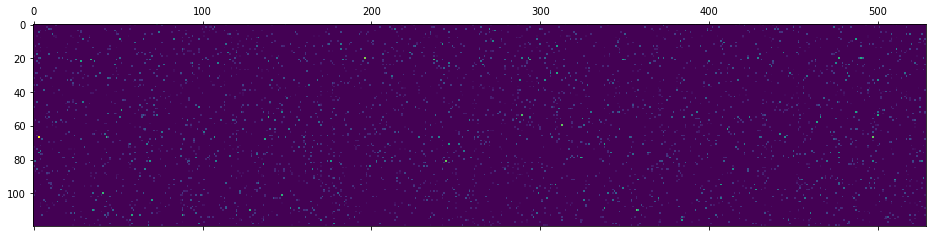

<Figure size 1080x216 with 0 Axes>

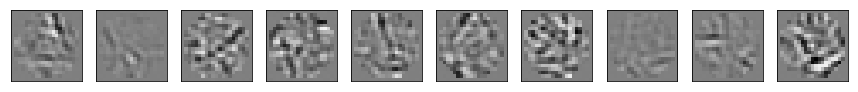

<Figure size 1080x216 with 0 Axes>

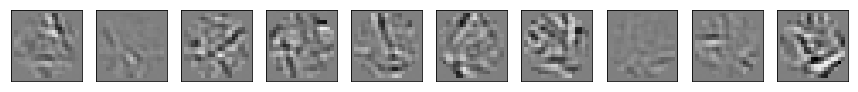

<Figure size 1080x216 with 0 Axes>

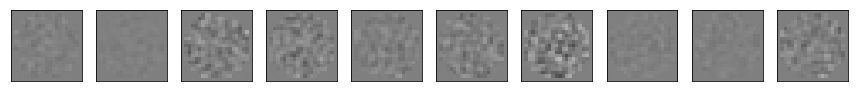

mean deviation of coefficients =  0.06559586779233409 0.0342955893881636 0.03187384195183852
total deviation of coefficients =  0.023787690933187885
mean deviation of quantiles =  0.006757070199888116
mean deviation of quantiles =  0.006724191088409117
total deviation of quantiles =  0.005451247113266628
ratio deviation of quantiles =  0.8067471480993182
proba incorrect coefficients =  0.2505496625413516
proba incorrect coefficients (strong) =  0.044683734050094515


In [7]:
def shuffling(data, sparse_code, dico, N_show=10):
    if do_random:
        from shl_scripts.shl_encode import inv_quantile, inv_rescaling
        sparse_code_bar = inv_rescaling(inv_quantile(dico.P_cum, np.random.rand(sparse_code.shape[0], sparse_code.shape[1])), C=shl.C)
    else:
        sparse_code = sparse_encode(data, dico.dictionary, P_cum=dico.P_cum, C=shl.C, 
                                     l0_sparseness=l0_sparseness_noise, gain=None)   

        sparse_code_bar = sparse_code.copy()
        
        sparse_code_bar = sparse_code_bar.T
        np.random.shuffle(sparse_code_bar)
        sparse_code_bar = sparse_code_bar.T
        
        if do_double_shuffle:
            np.random.shuffle(sparse_code_bar)

    plt.matshow(sparse_code_bar[:N_show, :])
    plt.show()

    def threshold(sparse_code, l0_sparseness):
        thr = np.percentile(sparse_code, 100 * (1 - l0_sparseness/shl.n_dictionary ), axis=1)
        return (sparse_code>thr[:, np.newaxis])

    sparse_code_bar_high = threshold(sparse_code_bar, shl.l0_sparseness) * sparse_code_bar
    plt.matshow(sparse_code_bar_high[:N_show, :])
    plt.show()
    return sparse_code_bar, sparse_code_bar_high

def pipeline(sparse_code_bar, sparse_code_bar_high, dico, index, N_show=120):

    patches_bar = sparse_code_bar @ dico.dictionary
    SD = np.sqrt(np.mean(patches_bar**2, axis=1))


    P_cum_rec = dico.P_cum
    gain_rec = None

    sparse_code_rec = sparse_encode(patches_bar, dico.dictionary, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

    print('average non-zeros', np.count_nonzero(sparse_code_bar, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_bar_high, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_rec, axis=0)[:N_show])
    
    from shl_scripts.shl_tools import print_stats
    SD, SE = print_stats(patches_bar, dico.dictionary, sparse_code_rec, verbose=False, display=True)
    #plt.matshow(sparse_code_rec[:N_show, :])
    plt.show()

    print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_bar)), np.mean(np.abs(sparse_code_bar_high)), np.mean(np.abs(sparse_code_rec)))
    print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar_high-sparse_code_rec)))

    from shl_scripts.shl_encode import quantile, rescaling

    q_rec = quantile(dico.P_cum, rescaling(sparse_code_rec, C=shl.C), stick, do_fast=False)
    q_bar = quantile(dico.P_cum, rescaling(sparse_code_bar_high, C=shl.C), stick, do_fast=False)

    print('mean deviation of quantiles = ', np.mean(np.abs(q_bar)))
    print('mean deviation of quantiles = ', np.mean(np.abs(q_rec)))
    print('total deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec)))
    print('ratio deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar)))
    aerror = np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar))

    perror = 1 - np.mean( (sparse_code_bar>0) == (sparse_code_rec>0))
    print('proba incorrect coefficients = ', perror)

    perror_high = 1 - np.mean( (sparse_code_bar_high > 0) == (sparse_code_rec>0))
    print('proba incorrect coefficients (strong) = ', perror_high)
    
    return pd.DataFrame({'error':[(SD/SE).mean()],
                               'aerror':[aerror],
                               'perror':[perror],
                               'perror_high':[perror_high]
                                        },
                                index=[index])

record = None
for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method)

    sparse_code_bar, sparse_code_bar_high = shuffling(data[indx, :], sparse_code, dico[homeo_method])
    record_ = pipeline(sparse_code_bar, sparse_code_bar_high, dico[homeo_method], index=homeo_method)
    if record is None:
        record = record_
    else:
        record = pd.concat((record, record_))


In [8]:
record

,aerror,error,perror,perror_high
None,1.174838,1.899259,0.203977,0.064025
HAP,0.977617,2.435292,0.233209,0.053461
HEH,0.806747,2.955663,0.250550,0.044684


In [9]:
record_

,aerror,error,perror,perror_high
HEH,0.806747,2.955663,0.25055,0.044684


## Version used

In [10]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.3.1
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.2
shl_scripts 20171221
pandas 0.22.0
Thu Apr 26 16:00:41 2018 CEST